In [1]:
import random
from math import *
import time
import random
from math import *
import operator
import pandas as pd
import numpy as np

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
#from pandas.plotting import scatter_matrix
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from statsmodels.tools.eval_measures import rmse

# pre-processing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing.data import QuantileTransformer

# import libraries for model validation
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import metrics

from sklearn import datasets

In [2]:
location = r"E:\\MYLEARN\\2-ANALYTICS-DataScience\\datasets\\iris.csv"

In [3]:
# load the training data from iris.txt
df_training = pd.read_csv(location )

In [4]:
df_training.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [5]:
# copy the predictor variables into X and responses in y
X_df = df_training[['sepal_length','sepal_width', 'petal_length', 'petal_width']]
y_df = df_training['class']

In [6]:
type(X_df)

pandas.core.frame.DataFrame

In [7]:
X = X_df.values
y = y_df.values

In [8]:
type(X)

numpy.ndarray

In [9]:
skf = StratifiedKFold(n_splits=10, random_state=None)

# X is the feature set and y is the target
# for train_index, test_index in skf.split(X, y): 
#     #print("Train:", train_index, "Validation:", test_index) 
#     X_train, X_test = X[train_index], X[test_index] 
#     y_train, y_test = y[train_index], y[test_index]

In [10]:
# creating odd list of K for KNN
myList = list(range(1, 30))

neighbors = []

# subsetting just the odd ones
for i in myList:
    if i % 2 != 0:
        neighbors.append(i)
        
neighbors



[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]

In [11]:
# neighbors = filter(lambda x: x % 2 != 0, myList)

# empty list that will hold cv scores
cv_scores = []

# perform k-fold cross validation
for no_neighbors in neighbors:
    # instantiate the classifier
    knn = KNeighborsClassifier(n_neighbors=no_neighbors)
    
    scores = cross_val_score(knn, X, y, cv=skf)
    
    cv_scores.append(scores.mean())

In [12]:
cv_scores

[0.96,
 0.9666666666666666,
 0.9666666666666668,
 0.9666666666666668,
 0.9733333333333334,
 0.9666666666666668,
 0.9800000000000001,
 0.9733333333333334,
 0.9733333333333334,
 0.9733333333333334,
 0.9666666666666666,
 0.9733333333333334,
 0.9666666666666666,
 0.9666666666666666,
 0.9533333333333334]

In [14]:
# changing to misclassification error
MSE = [1 - x for x in cv_scores]
MSE

[0.040000000000000036,
 0.03333333333333344,
 0.033333333333333215,
 0.033333333333333215,
 0.026666666666666616,
 0.033333333333333215,
 0.019999999999999907,
 0.026666666666666616,
 0.026666666666666616,
 0.026666666666666616,
 0.03333333333333344,
 0.026666666666666616,
 0.03333333333333344,
 0.03333333333333344,
 0.046666666666666634]

In [15]:
print(neighbors)

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]


The optimal number of neighbors is  13


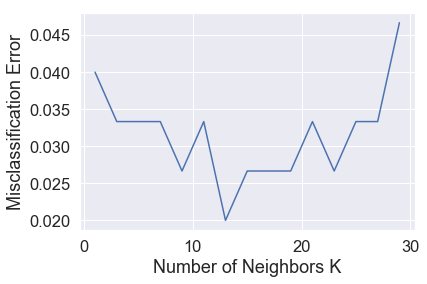

In [16]:
# determining best K
optimal_k = neighbors[MSE.index(min(MSE))]

print ("The optimal number of neighbors is ", optimal_k)

# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()